<a href="https://www.kaggle.com/code/shubhamgupta012/eda-on-sugarcane-use?scriptVersionId=133936466" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-countries-by-sugarcane-production/List of Countries by Sugarcane Production.csv


In [2]:
df = pd.read_csv('/kaggle/input/list-of-countries-by-sugarcane-production/List of Countries by Sugarcane Production.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
df.describe()

,Unnamed: 0
count,103.000000
mean,51.000000
std,29.877528
min,0.000000
25%,25.500000
50%,51.000000
75%,76.500000
max,102.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [5]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [6]:
df.rename(columns=lambda x: x.replace('.', ','), inplace=True)

In [7]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".", "")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(",", "").str.replace(".", "")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(",", "").str.replace(".", "")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(",", "").str.replace(".", "")

/tmp/ipykernel_20/1046719761.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production (Tons)"] = df["Production (Tons)"].str.replace(".", "")
/tmp/ipykernel_20/1046719761.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(",", "").str.replace(".", "")
/tmp/ipykernel_20/1046719761.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(",", "").str.replace(".", "")
/tmp/ipyke

In [8]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [9]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df['Production (Tons)'] = df['Production (Tons)'].astype('int')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].astype('int')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].astype('int')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].astype('int')

In [12]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)              int64
Production per Person (Kg)     int64
Acreage (Hectare)              int64
Yield (Kg / Hectare)           int64
dtype: object

In [13]:
df.duplicated().sum()

0

In [14]:
df['Country'].value_counts()

Brazil                1
Taiwan                1
Ghana                 1
Somalia               1
Niger                 1
                     ..
Zambia                1
Nepal                 1
Dominican Republic    1
Honduras              1
Syria                 1
Name: Country, Length: 102, dtype: int64

In [15]:
df['Continent'].value_counts()

Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: ylabel='Continent'>

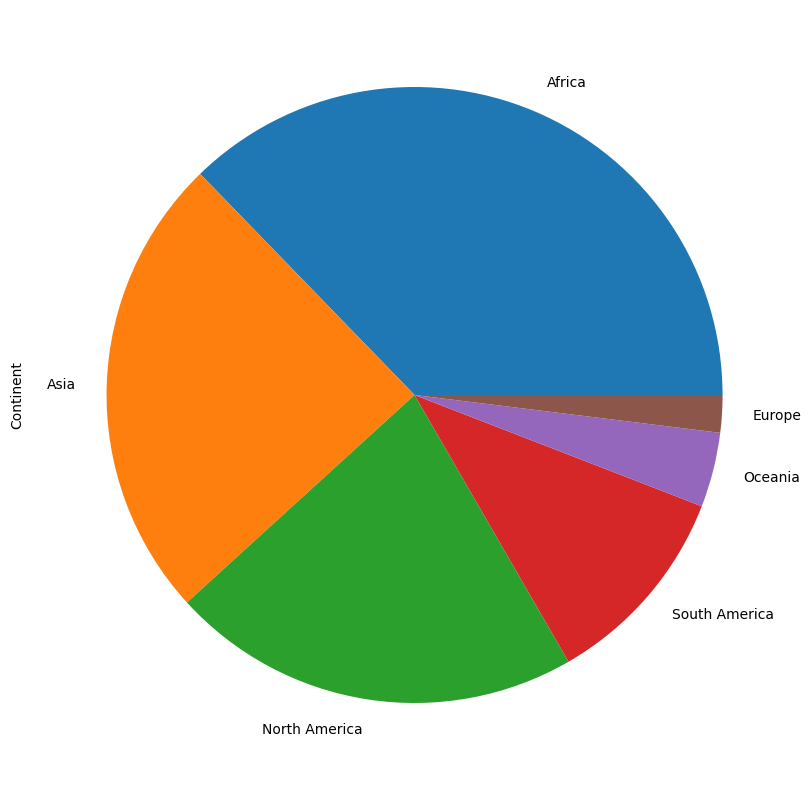

In [17]:
plt.figure(figsize=(20,10))
df['Continent'].value_counts().plot.pie()

<Axes: ylabel='Acreage (Hectare)'>

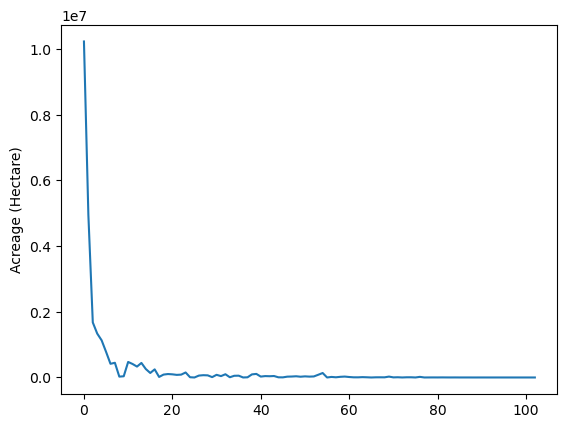

In [18]:
sns.lineplot(df['Acreage (Hectare)'])

<Axes: ylabel='Yield (Kg / Hectare)'>

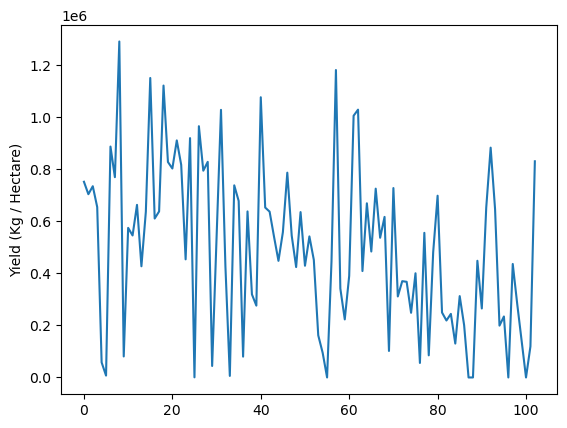

In [19]:

sns.lineplot(df['Yield (Kg / Hectare)'])

<Axes: ylabel='Production per Person (Kg)'>

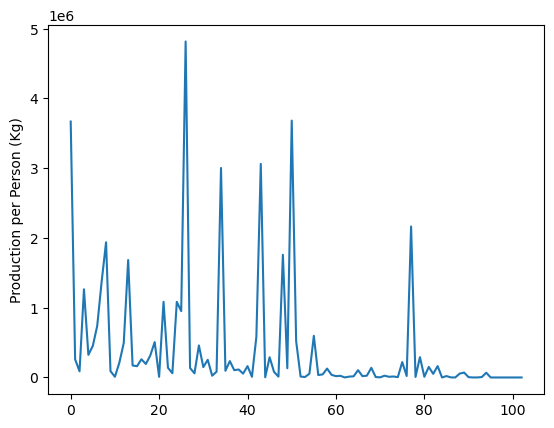

In [20]:
sns.lineplot(df['Production per Person (Kg)'])

<Axes: ylabel='Production (Tons)'>

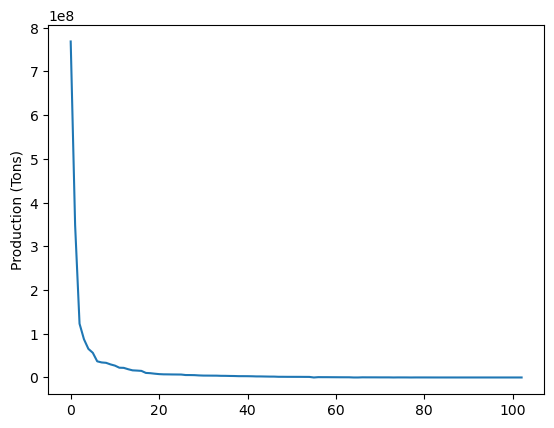

In [21]:
sns.lineplot(df['Production (Tons)'])

In [22]:
# sns.countplot(data=df,x=df['Continent'],y=df['Production (Tons)'])

## Total Production by Continent

<BarContainer object of 6 artists>

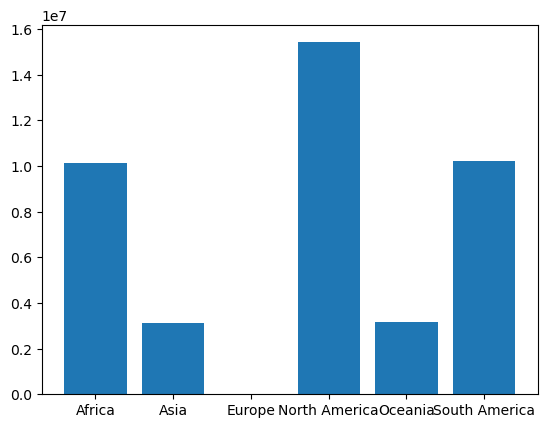

In [23]:
continent_production = df.groupby("Continent")["Production per Person (Kg)"].sum()

plt.bar(continent_production.index, continent_production.values)

<BarContainer object of 6 artists>

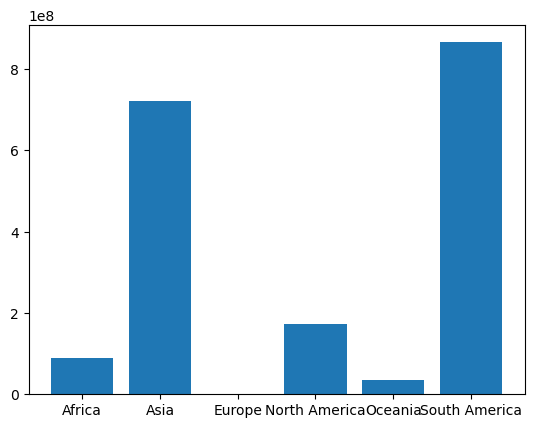

In [24]:
continent_production_per = df.groupby("Continent")["Production (Tons)"].sum()

plt.bar(continent_production_per.index, continent_production_per.values)

<BarContainer object of 6 artists>

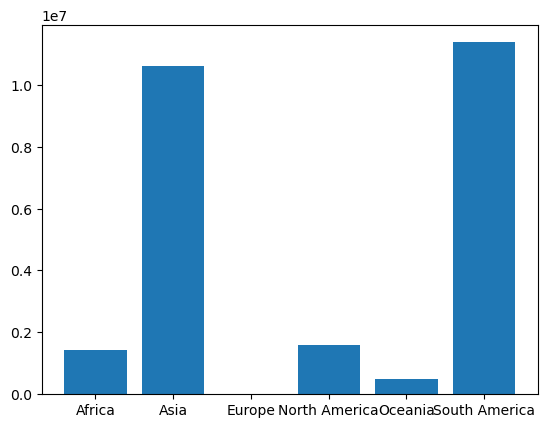

In [25]:

continent_acreage = df.groupby("Continent")["Acreage (Hectare)"].sum()

plt.bar(continent_acreage.index, continent_acreage.values)

<BarContainer object of 6 artists>

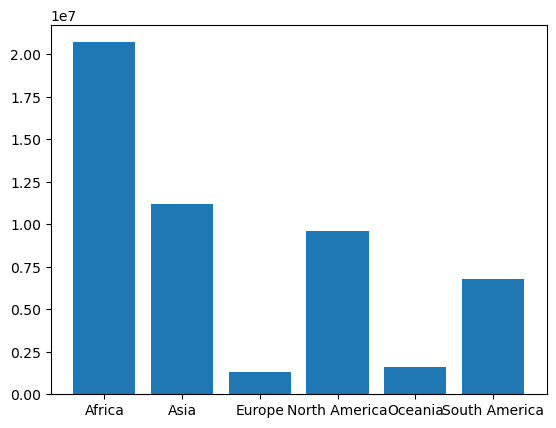

In [26]:

continent_acreages = df.groupby("Continent")["Yield (Kg / Hectare)"].sum()

plt.bar(continent_acreages.index, continent_acreages.values)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Production (Tons)'}>],
       [<Axes: title={'center': 'Production per Person (Kg)'}>,
        <Axes: title={'center': 'Acreage (Hectare)'}>],
       [<Axes: title={'center': 'Yield (Kg / Hectare)'}>, <Axes: >]],
      dtype=object)

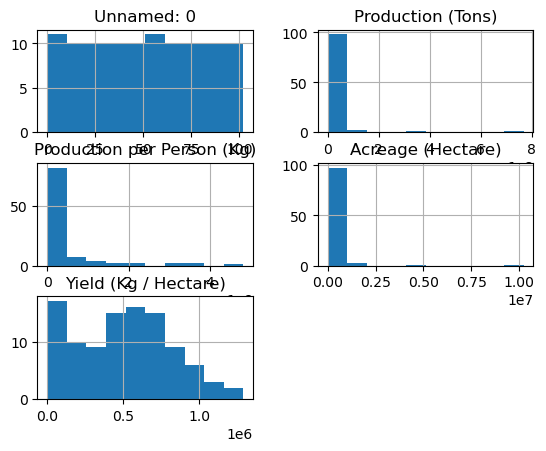

In [27]:
df.hist()

/tmp/ipykernel_20/3141177460.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield (Kg / Hectare)'])
/tmp/ipykernel_20/3141177460.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Acreage (Hectare)'])


Text(0.5, 1.0, 'Area of Sugarcane ')

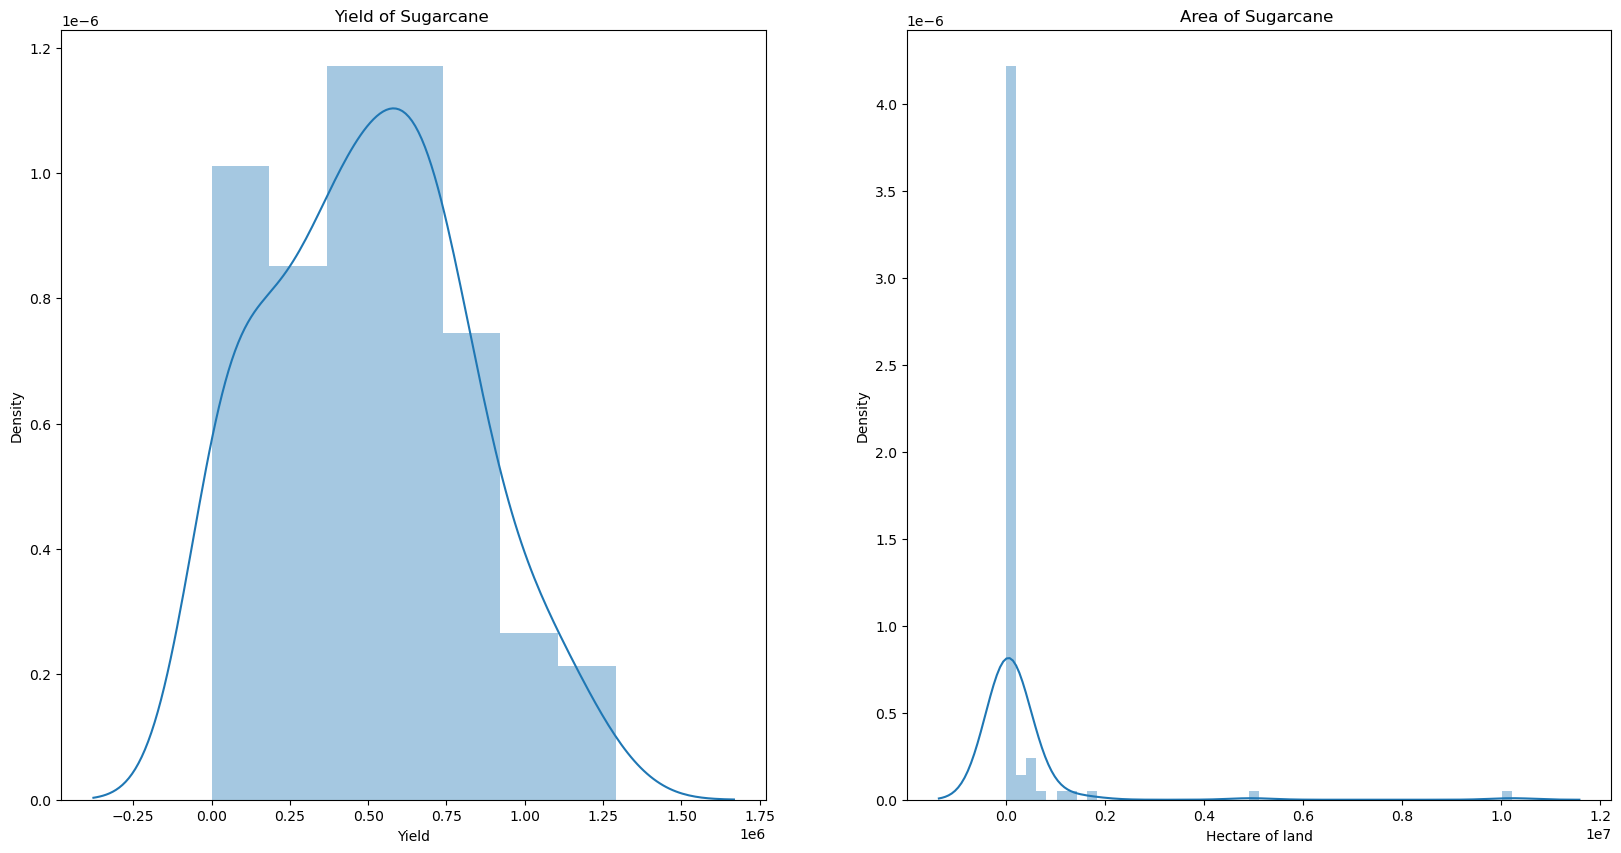

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['Yield (Kg / Hectare)'])
plt.xlabel('Yield')
plt.ylabel('Density')
plt.title('Yield of Sugarcane ')
plt.subplot(1,2,2)
sns.distplot(df['Acreage (Hectare)'])
plt.xlabel('Hectare of land')
plt.ylabel('Density')
plt.title('Area of Sugarcane ')

/tmp/ipykernel_20/1139919382.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production (Tons)'])
/tmp/ipykernel_20/1139919382.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production per Person (Kg)'])


Text(0.5, 1.0, 'Production per person of Sugarcane ')

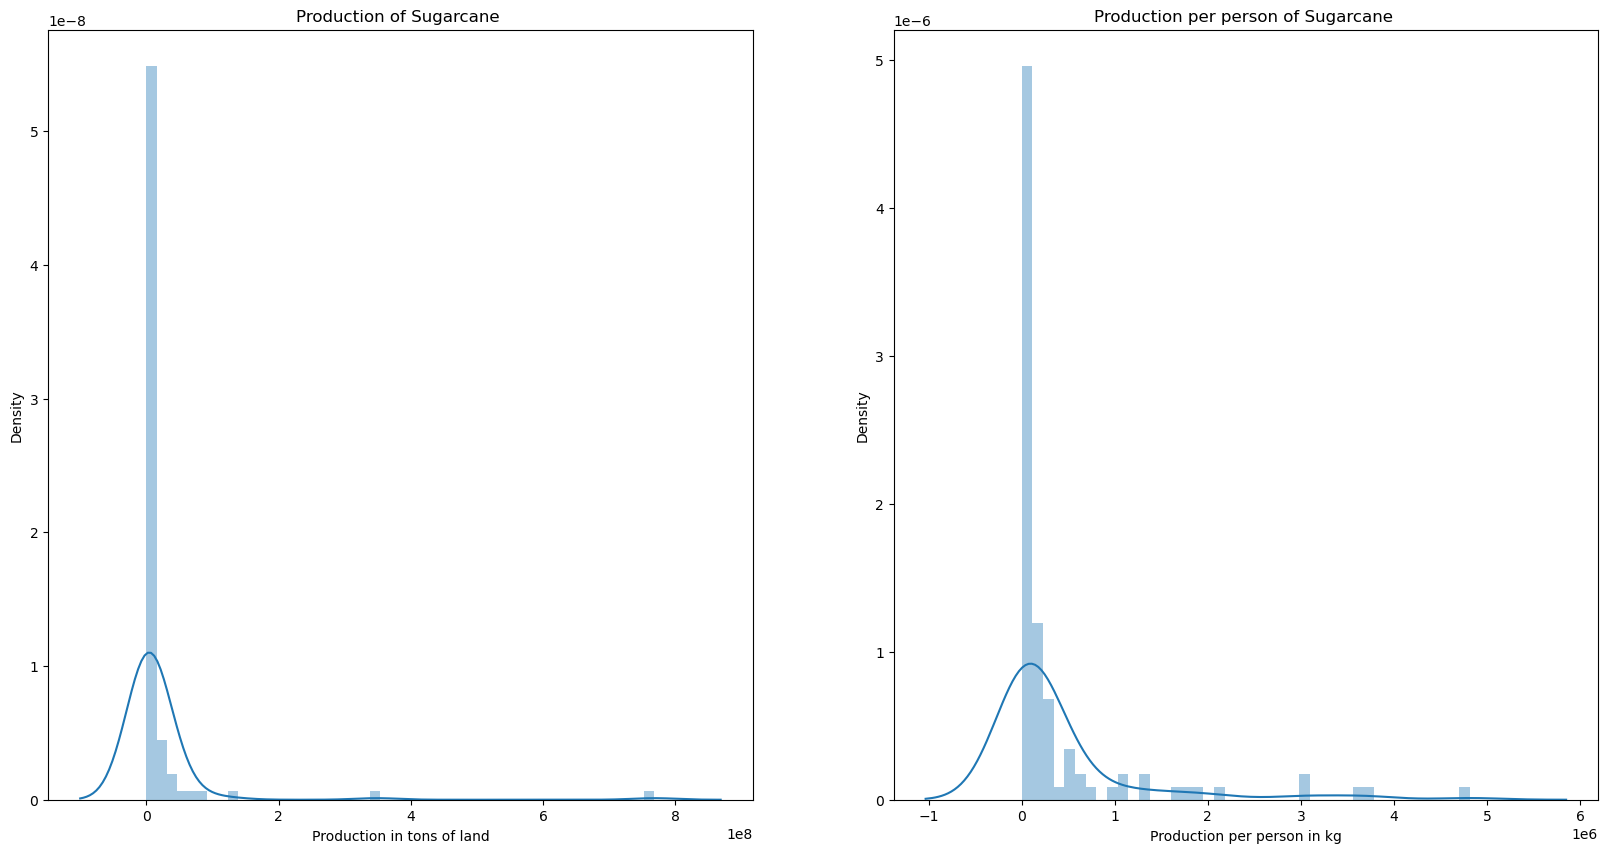

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['Production (Tons)'])
plt.xlabel('Production in tons of land')
plt.ylabel('Density')
plt.title('Production of Sugarcane ')
plt.subplot(1,2,2)
sns.distplot(df['Production per Person (Kg)'])
plt.xlabel('Production per person in kg')
plt.ylabel('Density')
plt.title('Production per person of Sugarcane ')